In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
import pickle

'''
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:,.5f}'.format)
'''

c:\Users\lesmo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


"\npd.set_option('display.max_rows', 500)\npd.set_option('display.max_columns', 500)\npd.set_option('display.width', 1000)\npd.set_option('display.float_format', '{:,.5f}'.format)\n"

# Facilities EDA

In [5]:
df5s = pickle.load(open("../data/facilities_wide.pkl", "rb"))
df5s=df5s.replace(r'^\s*$', np.nan, regex=True)
print(df5s.shape)
df5s.head()

(307, 55)


,hotel_name_,all_facilities,unlist,facilities_count,in_top_facilities,air conditioning,non-smoking rooms,fire extinguishers,cctv in common areas,private bathroom,...,hairdryer,slippers,key access,accessible parking,facilities for disabled guests,wardrobe or closet,clothes rack,socket near the bed,bar,ironing service
0,RedDoorz near East Avenue Medical Center,"[[Toilet paper, Towels, Towels/Sheets (extra f...","[toilet paper, towels, towels/sheets (extra fe...",22,"[toilet paper, towels, toilet, free toiletries...",1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Skylab Guesthouse,"[[Toilet paper, Towels, Additional bathroom, B...","[toilet paper, towels, additional bathroom, bi...",97,"[toilet paper, towels, bidet, slippers, toilet...",1,1,1,0,0,...,1,1,1,0,0,0,0,1,0,1
2,The Excelsior Hotel Las Piñas,"[[Toilet paper, Towels, Bidet, Guest bathroom,...","[toilet paper, towels, bidet, guest bathroom, ...",97,"[toilet paper, towels, bidet, slippers, privat...",1,1,1,1,1,...,1,1,0,1,0,1,1,1,1,0
3,Rothman Hotel,"[[Private Bathroom, Toilet, Free toiletries, S...","[private bathroom, toilet, free toiletries, sh...",38,"[private bathroom, toilet, free toiletries, sh...",1,1,0,1,1,...,0,0,0,0,1,0,0,0,1,1
4,OYO 772 Remedios Apartment,"[[TV], [Daily housekeeping, Concierge], [Fire ...","[tv, daily housekeeping, concierge, fire extin...",11,"[tv, daily housekeeping, concierge, fire extin...",1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [7]:

df5s = df5s.drop(['all_facilities', 'unlist', 'in_top_facilities'], axis=1)
df5s

,hotel_name_,facilities_count,air conditioning,non-smoking rooms,fire extinguishers,cctv in common areas,private bathroom,smoke alarms,toilet,tv,...,hairdryer,slippers,key access,accessible parking,facilities for disabled guests,wardrobe or closet,clothes rack,socket near the bed,bar,ironing service
0,RedDoorz near East Avenue Medical Center,22,1,1,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,Skylab Guesthouse,97,1,1,1,0,0,0,1,0,...,1,1,1,0,0,0,0,1,0,1
2,The Excelsior Hotel Las Piñas,97,1,1,1,1,1,1,1,1,...,1,1,0,1,0,1,1,1,1,0
3,Rothman Hotel,38,1,1,0,1,1,0,1,1,...,0,0,0,0,1,0,0,0,1,1
4,OYO 772 Remedios Apartment,11,1,1,1,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,RedDoorz at EDSA Pasay,18,1,0,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
303,Kabayan Hotel Pasay,47,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,1,0,0,0
304,"Crimson Hotel Filinvest City, Manila",56,1,1,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
305,RedDoorz @ Jardin LRT Tayuman Manila,14,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [177]:
df5s.iloc[0][1:].sum()

18

In [178]:
df5s['no_of_facilities'] = df5s.sum(axis = 1)

In [180]:
df5s.sort_values(by=['no_of_facilities'], inplace=True, ascending=True)
df5s

,hotel_name_,air conditioning,non-smoking rooms,fire extinguishers,cctv in common areas,private bathroom,smoke alarms,toilet,tv,24-hour security,...,slippers,key access,accessible parking,facilities for disabled guests,wardrobe or closet,clothes rack,socket near the bed,bar,ironing service,no_of_facilities
46,Ranchotel Alabang,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
149,OYO 841 Metro Deluxe Residences,0,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5
101,OYO 474 Urbandeca Tower 316 - Nizami Condotel,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6
21,RedDoorz @ University Belt Manila,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6
20,OYO 790 Mango Inn,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Grand Hyatt Manila,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,47
186,Herald Suites - Multiple Use Hotel,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,48
248,"Shangri-La The Fort, Manila",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,48
237,Novotel Manila Araneta City Hotel - Multiple U...,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,48


In [181]:
df5s['no_of_facilities']

46      3
149     5
101     6
21      6
20      6
       ..
175    47
186    48
248    48
237    48
266    50
Name: no_of_facilities, Length: 307, dtype: int64

In [3]:
df = pickle.load(open("../data/merged_hotel_data.pkl", "rb"))
df=df.replace(r'^\s*$', np.nan, regex=True)
print(df.shape)
df

(76536, 94)


,hotel_name_,stars,location,review_rating,description,main_facilities,total_reviews,sub_ratings,sub_ratings_categories,sub_ratings_dict,...,nearest_resto,nearest_train,nearest_ocean,nearest_other,number_close,nearest_other_2km,zip_code,city,latitude,longitude
0,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,0.10,12.00,12.0,0.90,21,3,1100,Quezon City,14.650991,121.048615
1,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,0.10,12.00,12.0,0.90,21,3,1100,Quezon City,14.650991,121.048615
2,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,0.10,12.00,12.0,0.90,21,3,1100,Quezon City,14.650991,121.048615
3,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,0.10,12.00,12.0,0.90,21,3,1100,Quezon City,14.650991,121.048615
4,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,0.10,12.00,12.0,0.90,21,3,1100,Quezon City,14.650991,121.048615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76531,88 Courtyard Hotel,3,"24 Roxas Boulevard, corner Cuneta Avenue, Pasa...",7.5,You're eligible for a Genius discount at 88 Co...,"[Airport Shuttle, Non Smoking Rooms, Room-serv...",173,"[8.4, 7.4, 7.7, 7.8, 7.5, 8.1, 5.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.4', 'Facilities': '7.4', 'Cleanli...",...,0.05,0.85,16.0,0.95,21,2,1300,Pasay,14.543700,120.994650
76532,88 Courtyard Hotel,3,"24 Roxas Boulevard, corner Cuneta Avenue, Pasa...",7.5,You're eligible for a Genius discount at 88 Co...,"[Airport Shuttle, Non Smoking Rooms, Room-serv...",173,"[8.4, 7.4, 7.7, 7.8, 7.5, 8.1, 5.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.4', 'Facilities': '7.4', 'Cleanli...",...,0.05,0.85,16.0,0.95,21,2,1300,Pasay,14.543700,120.994650
76533,88 Courtyard Hotel,3,"24 Roxas Boulevard, corner Cuneta Avenue, Pasa...",7.5,You're eligible for a Genius discount at 88 Co...,"[Airport Shuttle, Non Smoking Rooms, Room-serv...",173,"[8.4, 7.4, 7.7, 7.8, 7.5, 8.1, 5.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.4', 'Facilities': '7.4', 'Cleanli...",...,0.05,0.85,16.0,0.95,21,2,1300,Pasay,14.543700,120.994650
76534,88 Courtyard Hotel,3,"24 Roxas Boulevard, corner Cuneta Avenue, Pasa...",7.5,You're eligible for a Genius discount at 88 Co...,"[Airport Shuttle, Non Smoking Rooms, Room-serv...",173,"[8.4, 7.4, 7.7, 7.8, 7.5, 8.1, 5.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.4', 'Facilities': '7.4', 'Cleanli...",...,0.05,0.85,16.0,0.95,21,2,1300,Pasay,14.543700,120.994650


# Facilities EDA

### Hotel Perspective

<AxesSubplot: xlabel='no_of_facilities', ylabel='Density'>

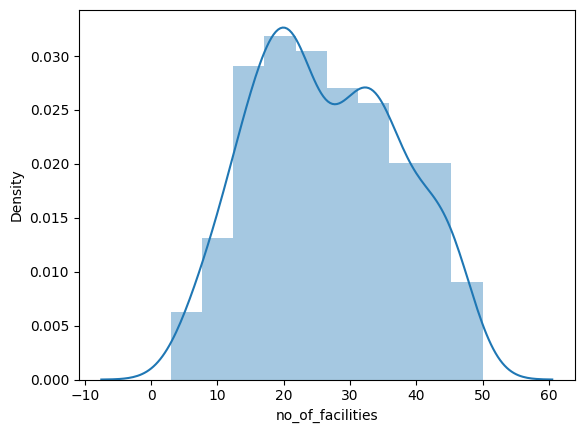

In [182]:
sns.distplot(df5s['no_of_facilities'])

In [183]:
df5s['hotel_name_'].iloc[:10]

46                                 Ranchotel Alabang
149                  OYO 841 Metro Deluxe Residences
101    OYO 474 Urbandeca Tower 316 - Nizami Condotel
21                 RedDoorz @ University Belt Manila
20                                 OYO 790 Mango Inn
27                                OYO 850 Clr Mn Inn
86                        OYO 794 Regatta Residences
174                     OYO 665 Pasay Centrale Hotel
250                    OYO 842 City Smiles Apartelle
300                       airobedz BGC - near Uptown
Name: hotel_name_, dtype: object

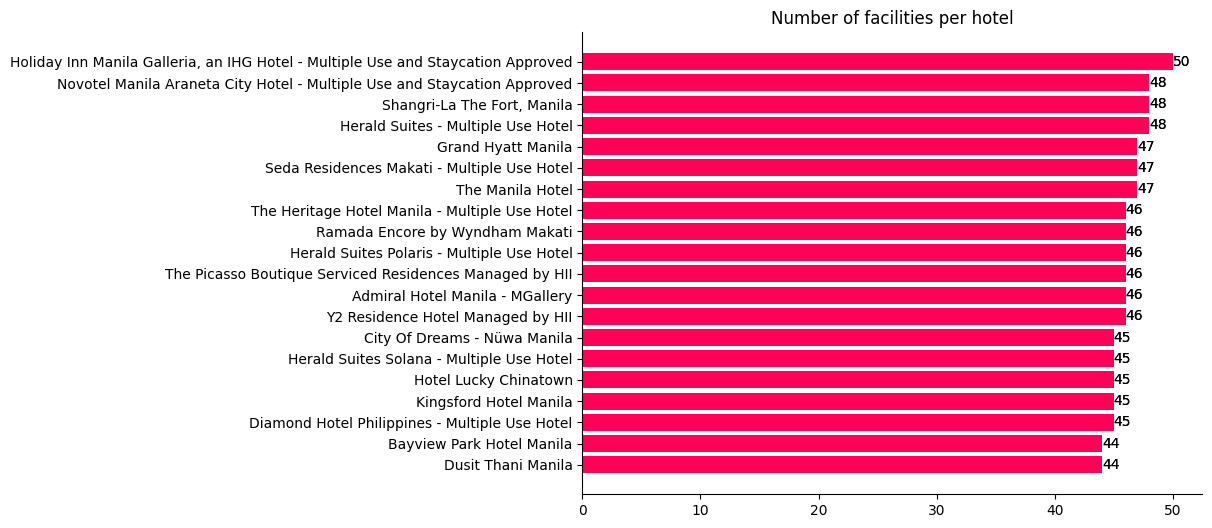

In [186]:
colors_l = ['#ff0257'] * 20

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(df5s['hotel_name_'].iloc[-20:], df5s['no_of_facilities'].iloc[-20:], color=colors_l)
ax.set_title('Number of facilities per hotel')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    ax.bar_label(ax.containers[0])
plt.show()

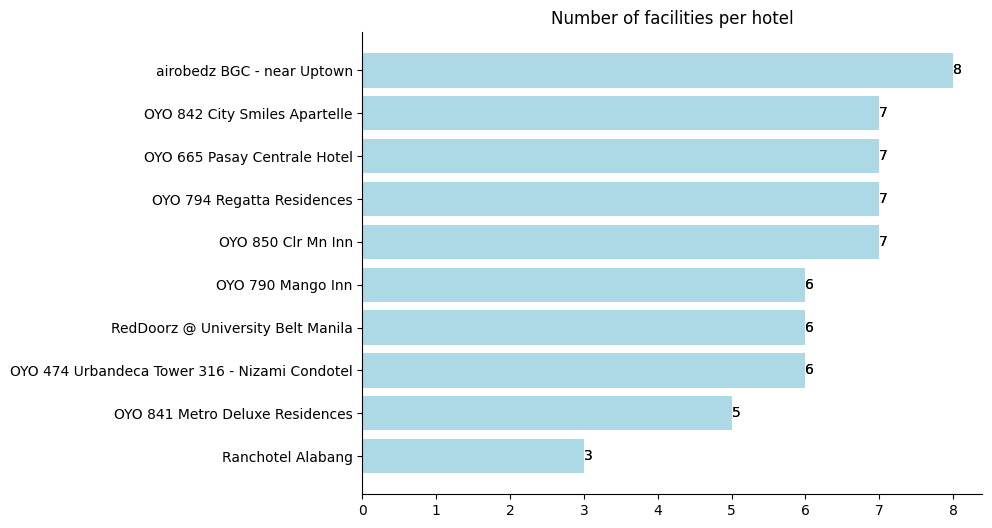

In [187]:
colors_l = ['lightblue'] * 20

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(df5s['hotel_name_'].iloc[:10], df5s['no_of_facilities'].iloc[:10], color=colors_l)
ax.set_title('Number of facilities per hotel')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    ax.bar_label(ax.containers[0])
plt.show()

### Facilities Perspective

In [90]:
df5s = df5s.set_index('hotel_name_')

In [97]:
df5s

,air conditioning,non-smoking rooms,fire extinguishers,cctv in common areas,private bathroom,smoke alarms,toilet,tv,24-hour security,towels,...,slippers,key access,accessible parking,facilities for disabled guests,wardrobe or closet,clothes rack,socket near the bed,bar,ironing service,no_of_facilities
hotel_name_,,,,,,,,,,,,,,,,,,,,,
Ranchotel Alabang,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
OYO 841 Metro Deluxe Residences,0,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5
OYO 474 Urbandeca Tower 316 - Nizami Condotel,1,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
RedDoorz @ University Belt Manila,1,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
OYO 790 Mango Inn,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Grand Hyatt Manila,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,47
Herald Suites - Multiple Use Hotel,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,48
"Shangri-La The Fort, Manila",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,48


In [109]:
df5s = df5s.drop('no_of_facilities', axis=1)

In [189]:
df2 = df5s.T
df2.head()

,46,149,101,21,20,27,86,174,250,300,...,210,274,271,241,151,175,186,248,237,266
hotel_name_,Ranchotel Alabang,OYO 841 Metro Deluxe Residences,OYO 474 Urbandeca Tower 316 - Nizami Condotel,RedDoorz @ University Belt Manila,OYO 790 Mango Inn,OYO 850 Clr Mn Inn,OYO 794 Regatta Residences,OYO 665 Pasay Centrale Hotel,OYO 842 City Smiles Apartelle,airobedz BGC - near Uptown,...,Herald Suites Polaris - Multiple Use Hotel,Ramada Encore by Wyndham Makati,The Heritage Hotel Manila - Multiple Use Hotel,The Manila Hotel,Seda Residences Makati - Multiple Use Hotel,Grand Hyatt Manila,Herald Suites - Multiple Use Hotel,"Shangri-La The Fort, Manila",Novotel Manila Araneta City Hotel - Multiple U...,"Holiday Inn Manila Galleria, an IHG Hotel - Mu..."
air conditioning,1,0,1,1,1,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
non-smoking rooms,0,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
fire extinguishers,0,1,0,1,0,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
cctv in common areas,0,1,1,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [113]:
df2['freq_of_facilities'] = df2.sum(axis = 1)
df2['freq_of_facilities']

air conditioning                       302
non-smoking rooms                      281
fire extinguishers                     251
cctv in common areas                   285
private bathroom                       237
smoke alarms                           223
toilet                                 218
tv                                     217
24-hour security                       217
towels                                 216
free toiletries                        237
24-hour front desk                     242
shower                                 210
toilet paper                           236
airport shuttle                         81
elevator                               191
linens                                 189
security alarm                         185
flat-screen tv                         267
daily housekeeping                     183
cctv outside property                  261
room service                           161
designated smoking area                161
safe       

In [124]:
df2.index[:10]

Index(['air conditioning', 'non-smoking rooms', 'fire extinguishers',
       'cctv in common areas', 'private bathroom', 'smoke alarms', 'toilet',
       'tv', '24-hour security', 'towels'],
      dtype='object')

In [127]:
df2.sort_values(by=['freq_of_facilities'], inplace=True, ascending=True)
df2

hotel_name_,Ranchotel Alabang,OYO 841 Metro Deluxe Residences,OYO 474 Urbandeca Tower 316 - Nizami Condotel,RedDoorz @ University Belt Manila,OYO 790 Mango Inn,OYO 850 Clr Mn Inn,OYO 794 Regatta Residences,OYO 665 Pasay Centrale Hotel,OYO 842 City Smiles Apartelle,airobedz BGC - near Uptown,...,Ramada Encore by Wyndham Makati,The Heritage Hotel Manila - Multiple Use Hotel,The Manila Hotel,Seda Residences Makati - Multiple Use Hotel,Grand Hyatt Manila,Herald Suites - Multiple Use Hotel,"Shangri-La The Fort, Manila",Novotel Manila Araneta City Hotel - Multiple Use and Staycation Approved,"Holiday Inn Manila Galleria, an IHG Hotel - Multiple Use and Staycation Approved",freq_of_facilities
airport shuttle,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,81
ironing service,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,84
bar,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,85
socket near the bed,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,87
clothes rack,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,88
wardrobe or closet,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,93
facilities for disabled guests,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,93
accessible parking,0,0,0,0,1,1,0,0,1,0,...,1,1,1,1,1,0,1,1,1,94
key access,0,1,0,0,0,1,0,0,1,0,...,0,0,1,1,0,1,1,0,1,97
slippers,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,101


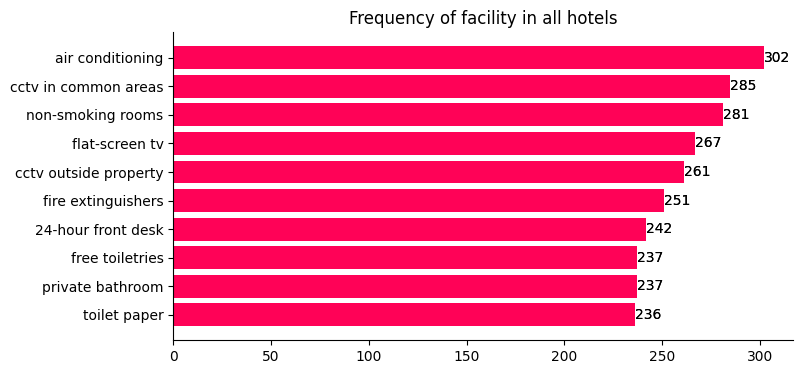

In [171]:
colors_l = ['#ff0257'] * 20

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df2.index[-10:], df2['freq_of_facilities'].iloc[-10:], color=colors_l)
ax.set_title('Frequency of facility in all hotels')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    ax.bar_label(ax.containers[0])
plt.show()

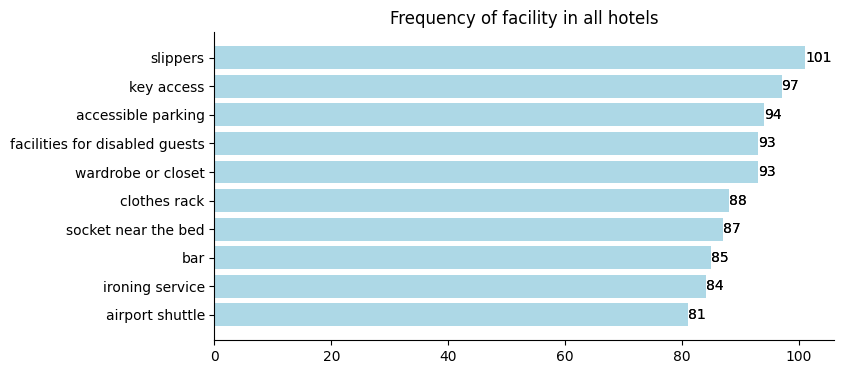

In [172]:
colors_l = ['lightblue'] * 20

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df2.index[:10], df2['freq_of_facilities'].iloc[:10], color=colors_l)
ax.set_title('Frequency of facility in all hotels')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    ax.bar_label(ax.containers[0])
plt.show()

# Language Dataset

In [231]:
df3 = pd.read_csv("../data/languages.csv")
df3 = df3.drop(['Unnamed: 0', 'all_facilities', 'unlist', 'in_top_facilities'], axis=1)
df3

,hotel_name_,english,filipino,japanese,chinese,korean,farsi,arabic,german,spanish,french
0,RedDoorz near East Avenue Medical Center,1,1,0,0,0,0,0,0,0,0
1,Skylab Guesthouse,1,1,0,0,0,0,0,0,1,0
2,The Excelsior Hotel Las Piñas,1,0,0,0,0,0,0,0,1,0
3,Rothman Hotel,1,1,0,0,0,0,0,0,0,0
4,OYO 772 Remedios Apartment,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
302,RedDoorz at EDSA Pasay,1,0,0,0,0,0,0,0,0,0
303,Kabayan Hotel Pasay,1,1,0,0,0,0,0,0,0,0
304,"Crimson Hotel Filinvest City, Manila",1,1,0,0,0,0,0,0,0,0
305,RedDoorz @ Jardin LRT Tayuman Manila,1,1,0,0,0,0,0,0,0,0


In [222]:
#since at least one of the main philippine languages are spoken, we can 
df3[(df3['english'] == 0) & (df3['filipino'] == 0)]


,hotel_name_,english,filipino,japanese,chinese,korean,farsi,arabic,german,spanish,french


In [232]:
df3['total_languages'] = df3.sum(axis = 1)
df3


,hotel_name_,english,filipino,japanese,chinese,korean,farsi,arabic,german,spanish,french,total_languages
0,RedDoorz near East Avenue Medical Center,1,1,0,0,0,0,0,0,0,0,2
1,Skylab Guesthouse,1,1,0,0,0,0,0,0,1,0,3
2,The Excelsior Hotel Las Piñas,1,0,0,0,0,0,0,0,1,0,2
3,Rothman Hotel,1,1,0,0,0,0,0,0,0,0,2
4,OYO 772 Remedios Apartment,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
302,RedDoorz at EDSA Pasay,1,0,0,0,0,0,0,0,0,0,1
303,Kabayan Hotel Pasay,1,1,0,0,0,0,0,0,0,0,2
304,"Crimson Hotel Filinvest City, Manila",1,1,0,0,0,0,0,0,0,0,2
305,RedDoorz @ Jardin LRT Tayuman Manila,1,1,0,0,0,0,0,0,0,0,2


In [233]:
df3.sort_values(by=['total_languages'], inplace=True, ascending=True)
df3

,hotel_name_,english,filipino,japanese,chinese,korean,farsi,arabic,german,spanish,french,total_languages
151,Seda Residences Makati - Multiple Use Hotel,1,0,0,0,0,0,0,0,0,0,1
190,Arzo Hotel Makati,1,0,0,0,0,0,0,0,0,0,1
217,RedDoorz near Pasay Taft,1,0,0,0,0,0,0,0,0,0,1
274,Ramada Encore by Wyndham Makati,1,0,0,0,0,0,0,0,0,0,1
37,OYO 885 Gerlins Lodge Two,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
185,DG Grami Hotel,1,1,0,0,1,0,0,0,1,0,4
237,Novotel Manila Araneta City Hotel - Multiple U...,1,1,0,0,1,0,0,0,1,0,4
247,Manila Marriott Hotel,1,1,0,1,0,0,0,1,1,0,5
234,Solaire Resort & Casino - Staycation Approved,1,1,1,1,1,0,0,0,1,0,6


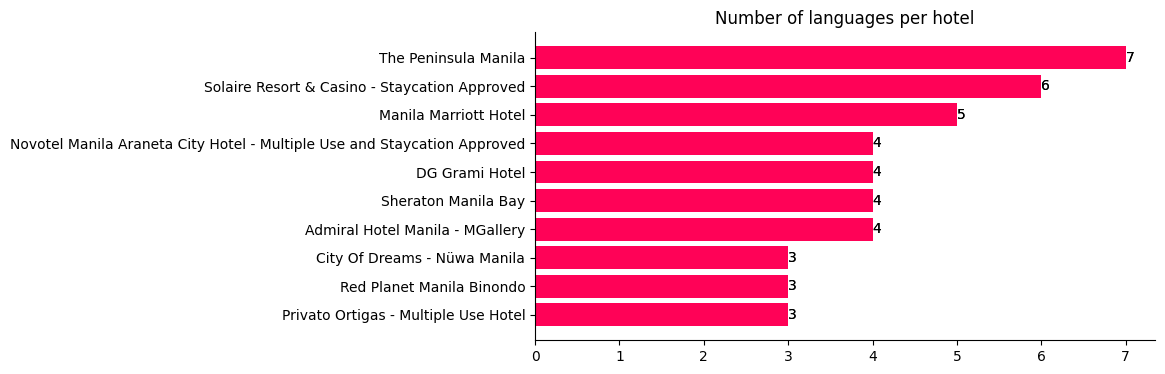

In [234]:
colors_l = ['#ff0257'] * 20

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df3['hotel_name_'].iloc[-10:], df3['total_languages'].iloc[-10:], color=colors_l)
ax.set_title('Number of languages per hotel')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    ax.bar_label(ax.containers[0])
plt.show()

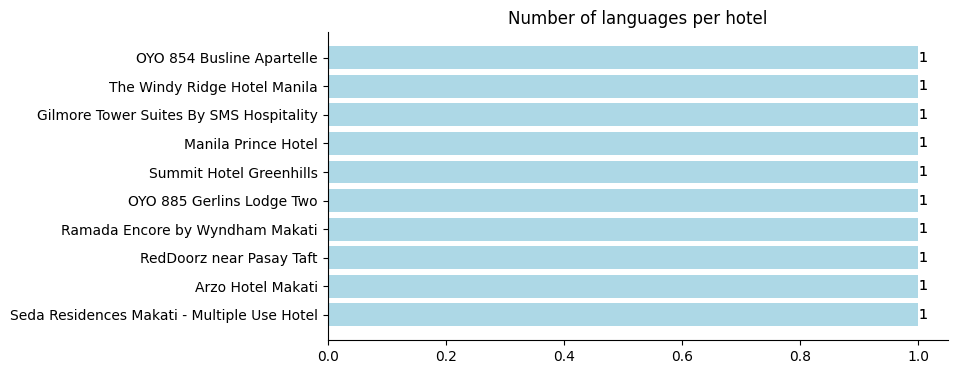

In [238]:
colors_l = ['lightblue'] * 20

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df3['hotel_name_'].iloc[:10], df3['total_languages'].iloc[:10], color=colors_l)
ax.set_title('Number of languages per hotel')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    ax.bar_label(ax.containers[0])
plt.show()

In [239]:
df3 = df3.set_index('hotel_name_')

In [240]:
df3 = df3.T
df3

hotel_name_,Seda Residences Makati - Multiple Use Hotel,Arzo Hotel Makati,RedDoorz near Pasay Taft,Ramada Encore by Wyndham Makati,OYO 885 Gerlins Lodge Two,Summit Hotel Greenhills,Manila Prince Hotel,Gilmore Tower Suites By SMS Hospitality,The Windy Ridge Hotel Manila,OYO 854 Busline Apartelle,...,Privato Ortigas - Multiple Use Hotel,Red Planet Manila Binondo,City Of Dreams - Nüwa Manila,Admiral Hotel Manila - MGallery,Sheraton Manila Bay,DG Grami Hotel,Novotel Manila Araneta City Hotel - Multiple Use and Staycation Approved,Manila Marriott Hotel,Solaire Resort & Casino - Staycation Approved,The Peninsula Manila
english,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
filipino,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
japanese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
chinese,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,1
korean,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
farsi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
arabic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
german,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
spanish,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,1
french,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [241]:
df3['freq_of_languages'] = df3.sum(axis = 1)
df3.sort_values(by=['freq_of_languages'], inplace=True)
df3

hotel_name_,Seda Residences Makati - Multiple Use Hotel,Arzo Hotel Makati,RedDoorz near Pasay Taft,Ramada Encore by Wyndham Makati,OYO 885 Gerlins Lodge Two,Summit Hotel Greenhills,Manila Prince Hotel,Gilmore Tower Suites By SMS Hospitality,The Windy Ridge Hotel Manila,OYO 854 Busline Apartelle,...,Red Planet Manila Binondo,City Of Dreams - Nüwa Manila,Admiral Hotel Manila - MGallery,Sheraton Manila Bay,DG Grami Hotel,Novotel Manila Araneta City Hotel - Multiple Use and Staycation Approved,Manila Marriott Hotel,Solaire Resort & Casino - Staycation Approved,The Peninsula Manila,freq_of_languages
farsi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
arabic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
german,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,2
korean,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,3
french,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,3
japanese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,6
chinese,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,1,1,12
spanish,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,42
filipino,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,241
english,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,303


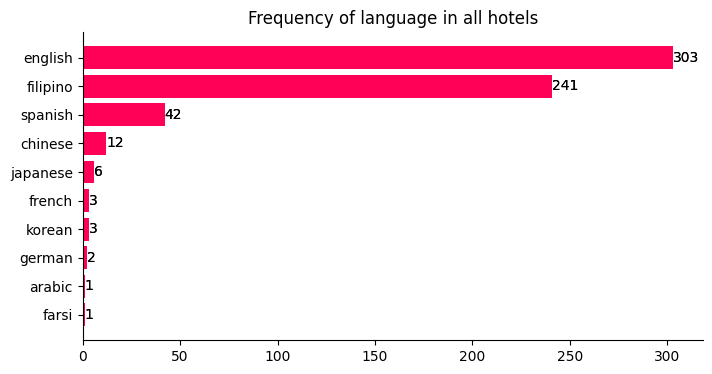

In [245]:
colors_l = ['#ff0257'] * 20

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df3.index[:10], df3['freq_of_languages'][:10], color=colors_l)
ax.set_title('Frequency of language in all hotels')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    ax.bar_label(ax.containers[0])
plt.show()

# Preprocessing

In [3]:
df["review_score"]=df["review_score"].apply(lambda x: float(x.strip()))
df["nights_stayed_"]=df["nights_stayed"].apply(lambda x: int(x.strip().split(" ")[0]))

month_map = {'January':1, 'February':2, 'March':3 , 'April':4, 'May':5, 'June':6,
             'July':7, 'August':8 , 'September':9, 'October':10, 'November':11, 'December':12}

df['date_stayed']=df['month_stayed'].apply(lambda x: dt.datetime(int(x.strip().split(" ")[1]),month_map[x.strip().split(" ")[0]],1))
df['month_name'] = df['month_stayed'].apply(lambda x: x.strip().split(" ")[0])
df['month'] = df['month_name'].map(month_map)
df['year'] = df['month_stayed'].apply(lambda x: x.strip().split(" ")[1])


df['date_reviewed_']=df['date_reviewed'].apply(lambda x: dt.datetime(int(x.strip().split(" ")[1]),month_map[x.strip().split(" ")[0]],1))
df['month_name_reviewed'] = df['date_reviewed'].apply(lambda x: x.strip().split(" ")[0])
df['month_reviewed'] = df['month_name_reviewed'].map(month_map)
df['year_reviewed'] = df['date_reviewed'].apply(lambda x: x.strip().split(" ")[1])



# Functions

In [4]:
def plot_bar_sp(df,c,title,dmap="default",orient='x',clr='#6cc8ba',hue=False, \
                 time_series=False, month_data=False,week_data=False,pod_data=False, long_dates=False,ax=None,limited=False):
    #F25278
    ax = ax or plt.gca()
    
    #data_df=df
    data_df = df[[c]]
    
    
    if hue!=False:  
        data_df = df[[c]+[hue]]
        #print(data_df)
    
    
       
    
    if dmap=="default":
        data_df['Class'] = data_df[c]
    
    else:
        data_df['Class'] = data_df[c].map(dmap)
    #print(data_df)
    
    #Order
    if time_series==False:
        o=data_df['Class'].value_counts().index
        #print(o)
    
    #Time- Series ORder
    else:
        o=data_df['Class'].value_counts().index.sort_values(ascending=True)
        
        
        if month_data==True:
            o=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct", "Nov", "Dec"]
            if long_dates==True:
                o=["January","February","March","April","May","June","July","August","September","October", "November", "December"]  
        if week_data==True:
            o=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"] 
            if long_dates==True:
                o=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"] 
                
        if pod_data==True:
            o=["early morning","breakfast","lunch","afternoon","dinner"] 
                #Would change this to off Hours
        
    if limited!=False:
        o=o[:limited]
        #print(o)
   
    #data_df["Class"]=data_df["Class"].astype(str)
    #print(data_df)
    #hue
    if hue==False:  
        if orient=='x':
            return sns.countplot(x=data_df['Class'], order=o,ax=ax, color=clr)
            

        else:
            return sns.countplot(y=data_df['Class'],order=o ,ax=ax,color=clr)
        
    if hue!=False:  
        #data_df["Class"]=data_df["Class"].astype(str)
        #l=o[:10]
        data_df["Class"] = pd.Categorical(data_df['Class'], o)
        if orient=='x':
            return sns.histplot(data_df, x="Class", hue="good_review", stat="percent",ax=ax,multiple="layer", shrink=.4,common_norm=False)

        else:
            return sns.histplot(data_df, y="Class", hue="good_review", stat="percent",ax=ax,multiple="dodge", shrink=.2,common_norm=False)

    ax.set_title(title)

# Column Setup

In [5]:
df.columns

Index(['hotel_name_', 'stars', 'location', 'review_rating', 'description',
       'main_facilities', 'total_reviews', 'sub_ratings',
       'sub_ratings_categories', 'sub_ratings_dict', 'hotel_surroundings',
       'hotel_surroundings_distance', 'surroundings_dict', 'room_type_x',
       'price_list', 'cheapest_price', 'facilities_groups', 'all_facilities',
       'link', 'room_price_dict', 'name', 'room_type_y', 'nights_stayed',
       'month_stayed', 'occupant_type', 'from_country', 'review_score',
       'date_reviewed', 'short_review', 'positive_review', 'negative_review',
       'nights_stayed_', 'date_stayed', 'month_name', 'month', 'year',
       'date_reviewed_', 'month_name_reviewed', 'month_reviewed',
       'year_reviewed'],
      dtype='object')

In [6]:
#id_cols=['name',"type1","type2"]
traveller_cols=['name','occupant_type','from_country',"room_type_y",'nights_stayed_',
                #'month_stayed',"'date_reviewed',",
                'date_stayed','month','year','month_name',
                'date_reviewed_','month_reviewed','year_reviewed',
                'review_score']

In [7]:
df_tr=df[traveller_cols]
df_tr["good_review"]=np.where(df_tr["review_score"]>=7.5,1,0)
df_tr

,name,occupant_type,from_country,room_type_y,nights_stayed_,date_stayed,month,year,month_name,date_reviewed_,month_reviewed,year_reviewed,review_score,good_review
0,Aira,Couple,Philippines,NaN,1,2022-01-01,1,2022,January,2022-01-01,1,2022,10.0,1
1,Nicanor,Family,Philippines,Triple Room,2,2022-11-01,11,2022,November,2022-11-01,11,2022,7.0,0
2,Henry,Couple,Philippines,NaN,1,2022-06-01,6,2022,June,2022-06-01,6,2022,5.0,0
3,Vinu,Solo traveler,India,Deluxe Room,6,2022-05-01,5,2022,May,2022-05-01,5,2022,6.0,0
4,Salt,Family,United Arab Emirates,Triple Room,1,2022-05-01,5,2022,May,2022-05-01,5,2022,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76531,Kern,Solo traveler,Philippines,NaN,1,2022-03-01,3,2022,March,2022-03-01,3,2022,10.0,1
76532,Jun,Couple,Philippines,NaN,1,2022-03-01,3,2022,March,2022-03-01,3,2022,10.0,1
76533,Kanji,Solo traveler,Philippines,NaN,2,2019-12-01,12,2019,December,2019-12-01,12,2019,5.0,0
76534,Antonino,Family,United Kingdom,NaN,2,2019-12-01,12,2019,December,2019-12-01,12,2019,2.9,0


In [8]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76536 entries, 0 to 76535
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            76536 non-null  object        
 1   occupant_type   76536 non-null  object        
 2   from_country    76313 non-null  object        
 3   room_type_y     59145 non-null  object        
 4   nights_stayed_  76536 non-null  int64         
 5   date_stayed     76536 non-null  datetime64[ns]
 6   month           76536 non-null  int64         
 7   year            76536 non-null  object        
 8   month_name      76536 non-null  object        
 9   date_reviewed_  76536 non-null  datetime64[ns]
 10  month_reviewed  76536 non-null  int64         
 11  year_reviewed   76536 non-null  object        
 12  review_score    76536 non-null  float64       
 13  good_review     76536 non-null  int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(3), 

In [9]:
df_tr.nunique()

name              21120
occupant_type         4
from_country        193
room_type_y         285
nights_stayed_       36
date_stayed          38
month                12
year                  4
month_name           12
date_reviewed_       38
month_reviewed       12
year_reviewed         4
review_score         36
good_review           2
dtype: int64

# EDA

## General Customer Overview

### Review Score

67.23502665412356

7.805375248249101

<AxesSubplot:ylabel='Frequency'>

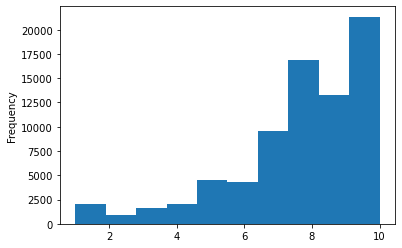

In [10]:
display(len(df_tr[df_tr.good_review==1])/len(df_tr)*100)
display(df_tr.review_score.mean())
df_tr.review_score.plot.hist()

Text(0.5, 1.0, 'Total Bad Reviews')

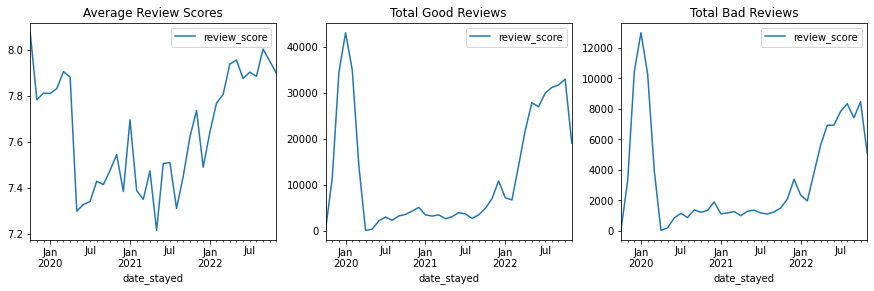

In [11]:
data1=df_tr.groupby("date_stayed")[["review_score"]].mean()
data2=df_tr[df_tr.good_review==1].groupby("date_stayed")[["review_score"]].sum()
data3=df_tr[df_tr.good_review==0].groupby("date_stayed")[["review_score"]].sum()

#line chart of monthly streams
fig= plt.figure(figsize=(15,4),)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

#default is line so you can omit kind= parameter
data1.plot(ax=ax1, kind='line')
data2.plot(ax=ax2, kind='line')
data3.plot(ax=ax3, kind='line')

ax1.set_title('Average Review Scores')
ax2.set_title('Total Good Reviews')
ax3.set_title('Total Bad Reviews')


### Traveller Details

(0.0, 11.0)

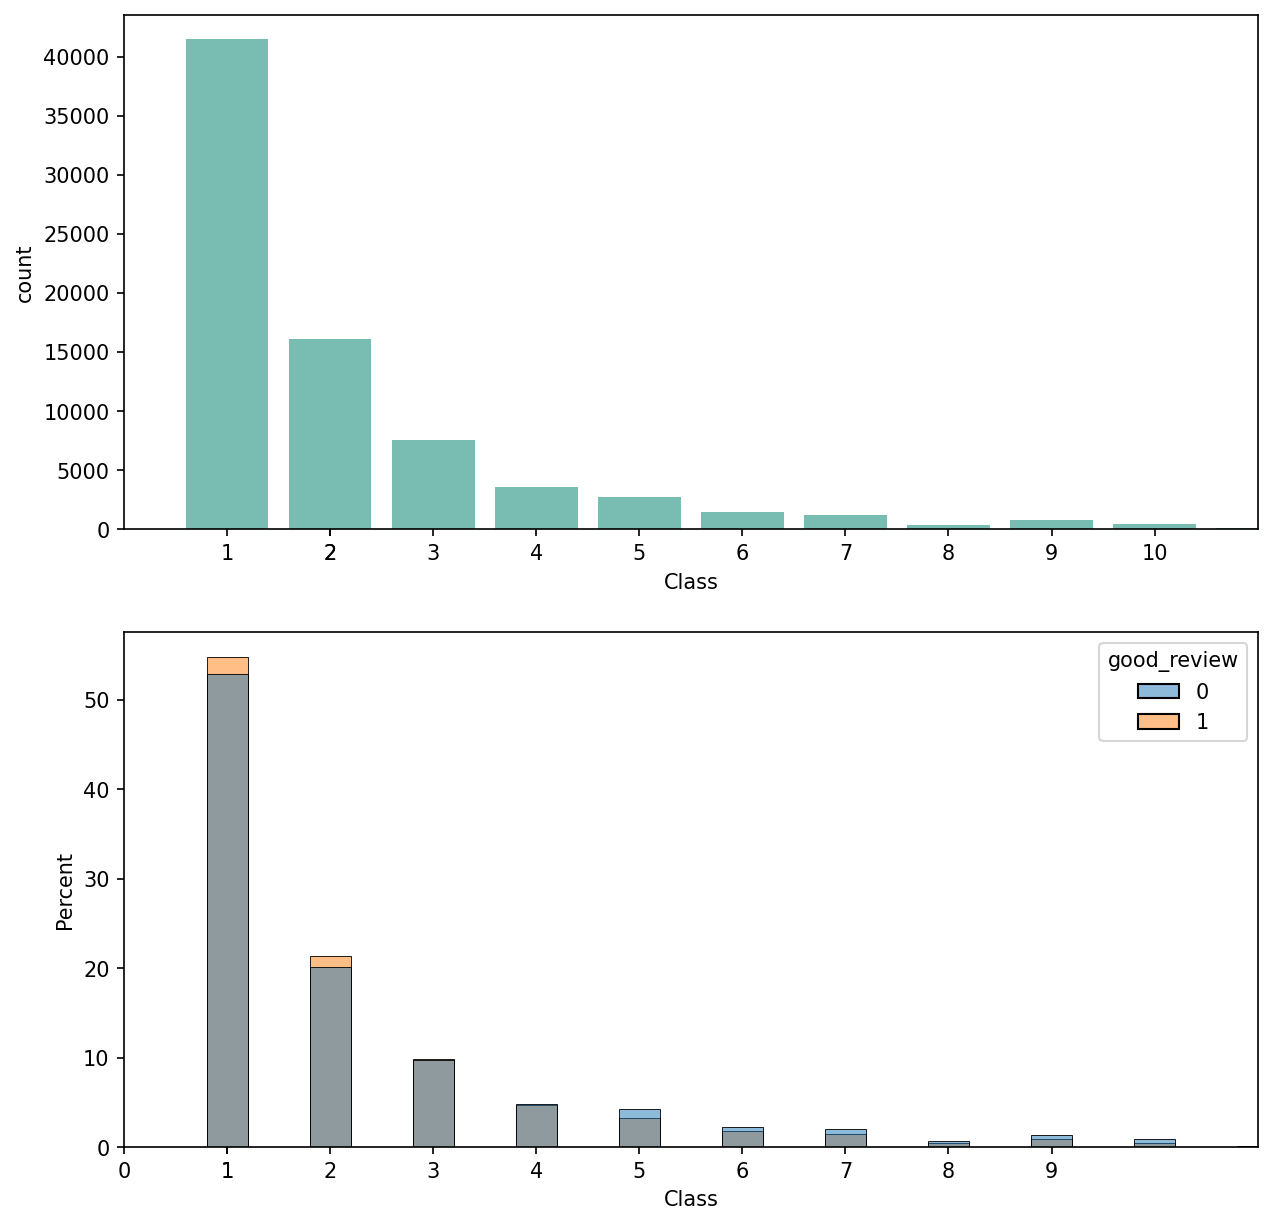

In [12]:



fig= plt.figure(figsize=(9.75,10),dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#plot_bar_sp(df_tr,"nights_stayed_","title",orient="x", time_series=True, clr='#6cc8ba',ax=ax1,)
#plot_bar_sp(df_tr,"nights_stayed_","title",orient="x",hue="good_review", time_series=True, clr='#6cc8ba',ax=ax2)

plot_bar_sp(df_tr,"nights_stayed_","title",orient="x", time_series=True,  clr='#6cc8ba',ax=ax1,)
plot_bar_sp(df_tr,"nights_stayed_","title",orient="x",hue="good_review", time_series=True,clr='#6cc8ba',ax=ax2)


ax1.set_xticks([1]+np.arange(0, 10).tolist())
ax2.set_xticks([1]+np.arange(0, 10).tolist())
ax1.set_xlim([-1, 10])
ax2.set_xlim([0, 11])

#ax2.sharex(ax1)

In [13]:
df_tr.nights_stayed_.value_counts(normalize=True)*100

1     54.198024
2     20.999268
3      9.826748
4      4.712815
5      3.600920
6      1.929811
7      1.635832
9      1.008676
10     0.610170
8      0.529163
14     0.151563
11     0.142417
12     0.128044
13     0.109752
15     0.092767
16     0.044424
30     0.039197
17     0.032664
18     0.024825
19     0.024825
21     0.022212
20     0.022212
29     0.020905
22     0.018292
28     0.014372
27     0.013066
26     0.011759
25     0.010453
23     0.006533
31     0.006533
24     0.003920
35     0.002613
32     0.001307
49     0.001307
45     0.001307
38     0.001307
Name: nights_stayed_, dtype: float64

<AxesSubplot:xlabel='Class', ylabel='Percent'>

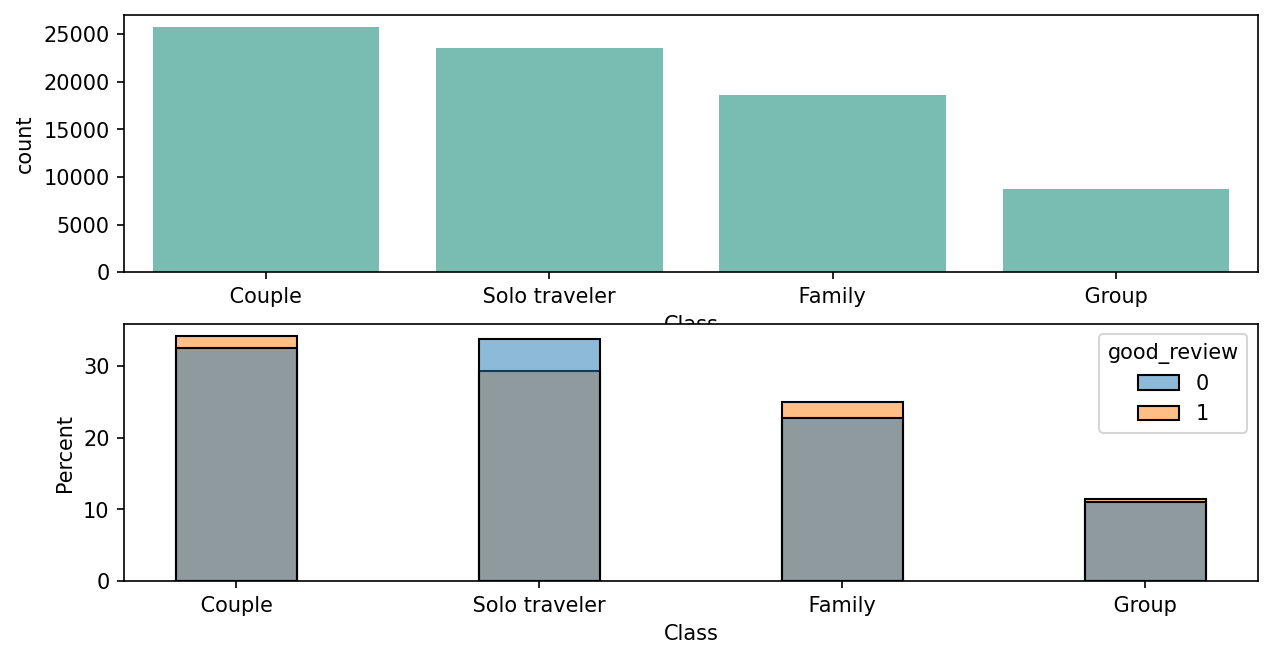

In [14]:



fig= plt.figure(figsize=(9.75,5),dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#plot_bar_sp(df_tr,"nights_stayed_","title",orient="x", time_series=True, clr='#6cc8ba',ax=ax1,)
#plot_bar_sp(df_tr,"nights_stayed_","title",orient="x",hue="good_review", time_series=True, clr='#6cc8ba',ax=ax2)

plot_bar_sp(df_tr,"occupant_type","title",orient="x",  clr='#6cc8ba',ax=ax1,)
plot_bar_sp(df_tr,"occupant_type","title",orient="x",hue="good_review",clr='#6cc8ba',ax=ax2)


# ax1.set_xticks([1]+np.arange(0, 10).tolist())
# ax2.set_xticks([1]+np.arange(0, 10).tolist())
# ax1.set_xlim([-1, 10])
# ax2.set_xlim([0, 11])

#ax2.sharex(ax1)

In [15]:
df_tr.occupant_type.value_counts(normalize=True)*100

 Couple            33.631232
 Solo traveler     30.729330
 Family            24.272238
 Group             11.367200
Name: occupant_type, dtype: float64

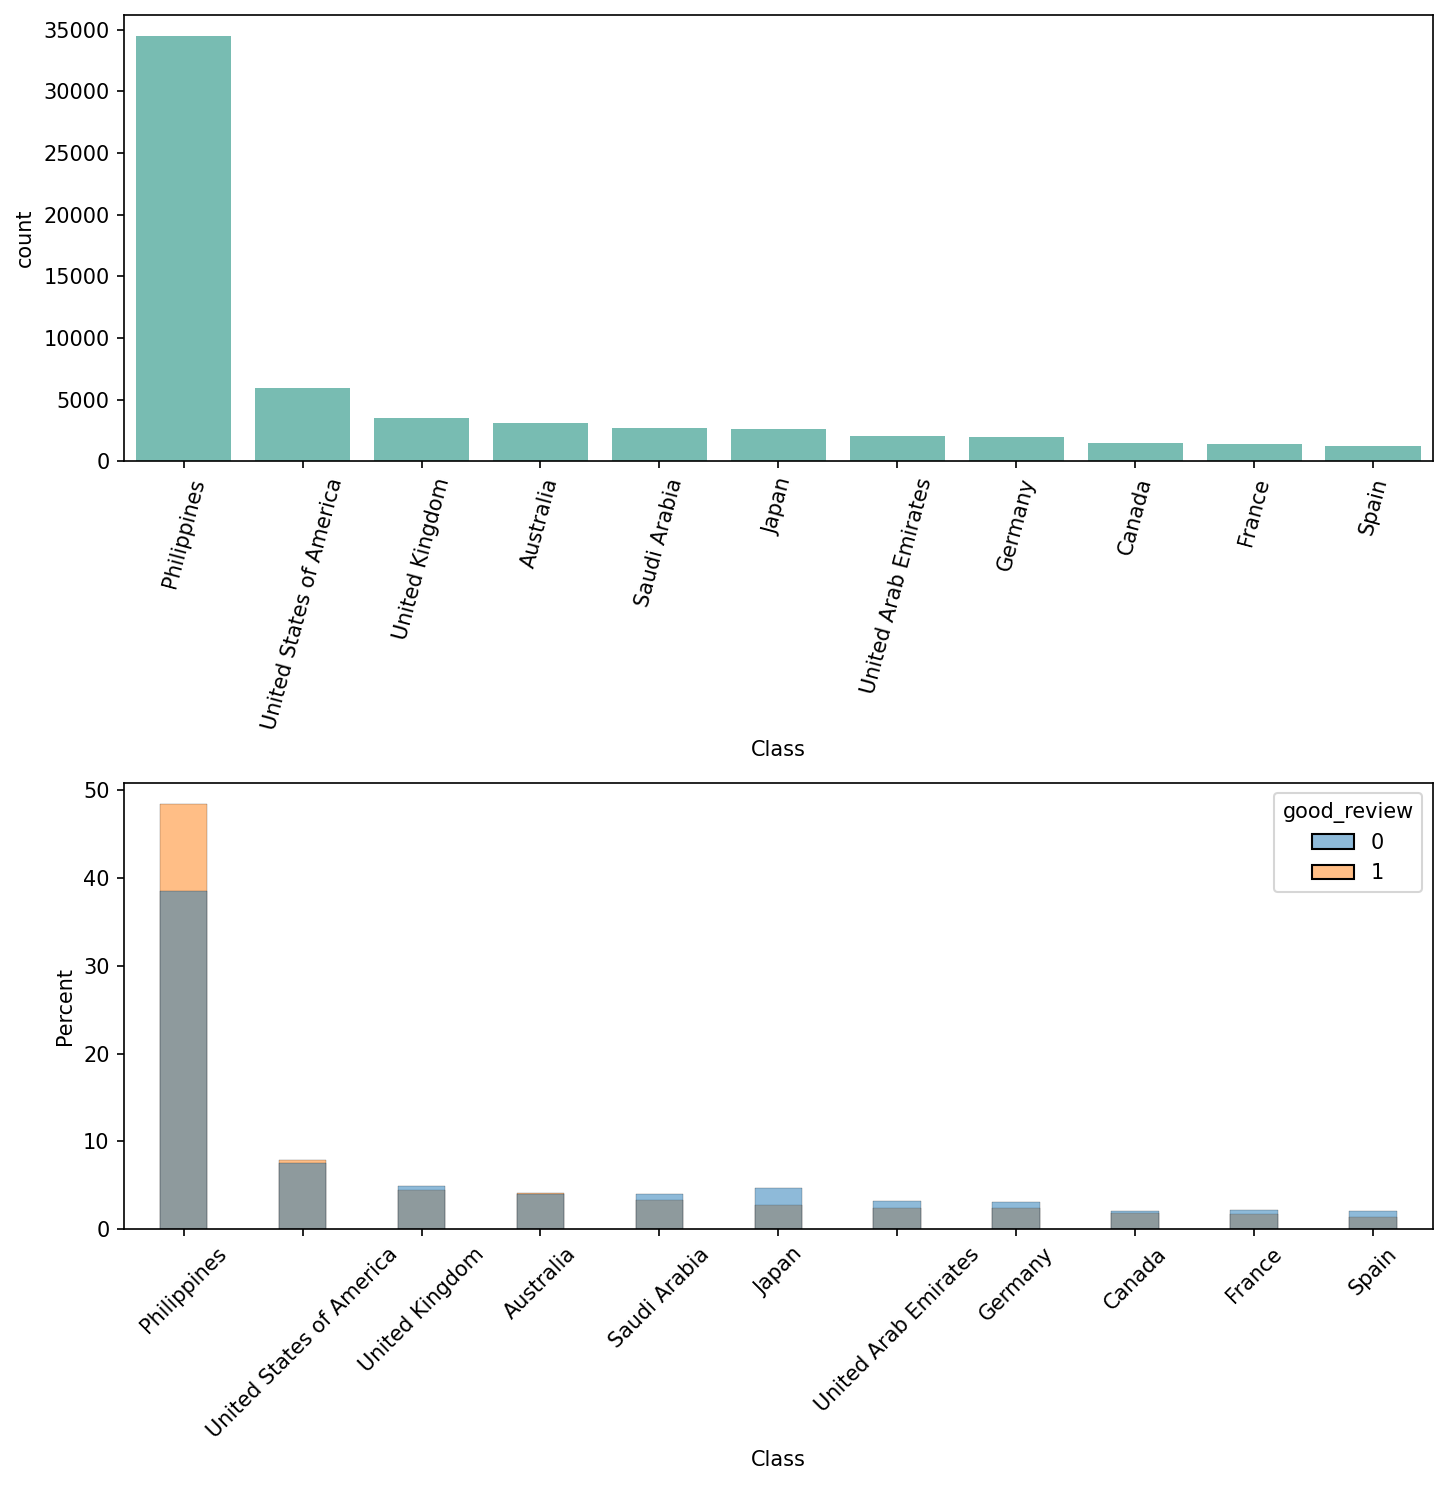

In [16]:



fig= plt.figure(figsize=(9.75,10),dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#plot_bar_sp(df_tr,"nights_stayed_","title",orient="x", time_series=True, clr='#6cc8ba',ax=ax1,)
#plot_bar_sp(df_tr,"nights_stayed_","title",orient="x",hue="good_review", time_series=True, clr='#6cc8ba',ax=ax2)

plot_bar_sp(df_tr,"from_country","title",orient="x",  clr='#6cc8ba',ax=ax1,)
plot_bar_sp(df_tr,"from_country","title",orient="x",hue="good_review",clr='#6cc8ba',ax=ax2)


# ax1.set_xticks([1]+np.arange(0, 10).tolist())
# ax2.set_xticks([1]+np.arange(0, 10).tolist())
ax1.set_xlim([-0.5, 10.5])
ax2.set_xlim([-0.5, 10.5])

#ax2.sharex(ax1)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=45)
fig.tight_layout()

In [17]:
display((df_tr.from_country.value_counts(normalize=True)*100).head(10))

Philippines                 45.149581
United States of America     7.756215
United Kingdom               4.612582
Australia                    4.051734
Saudi Arabia                 3.528888
Japan                        3.410952
United Arab Emirates         2.664028
Germany                      2.616854
Canada                       1.902690
France                       1.850275
Name: from_country, dtype: float64

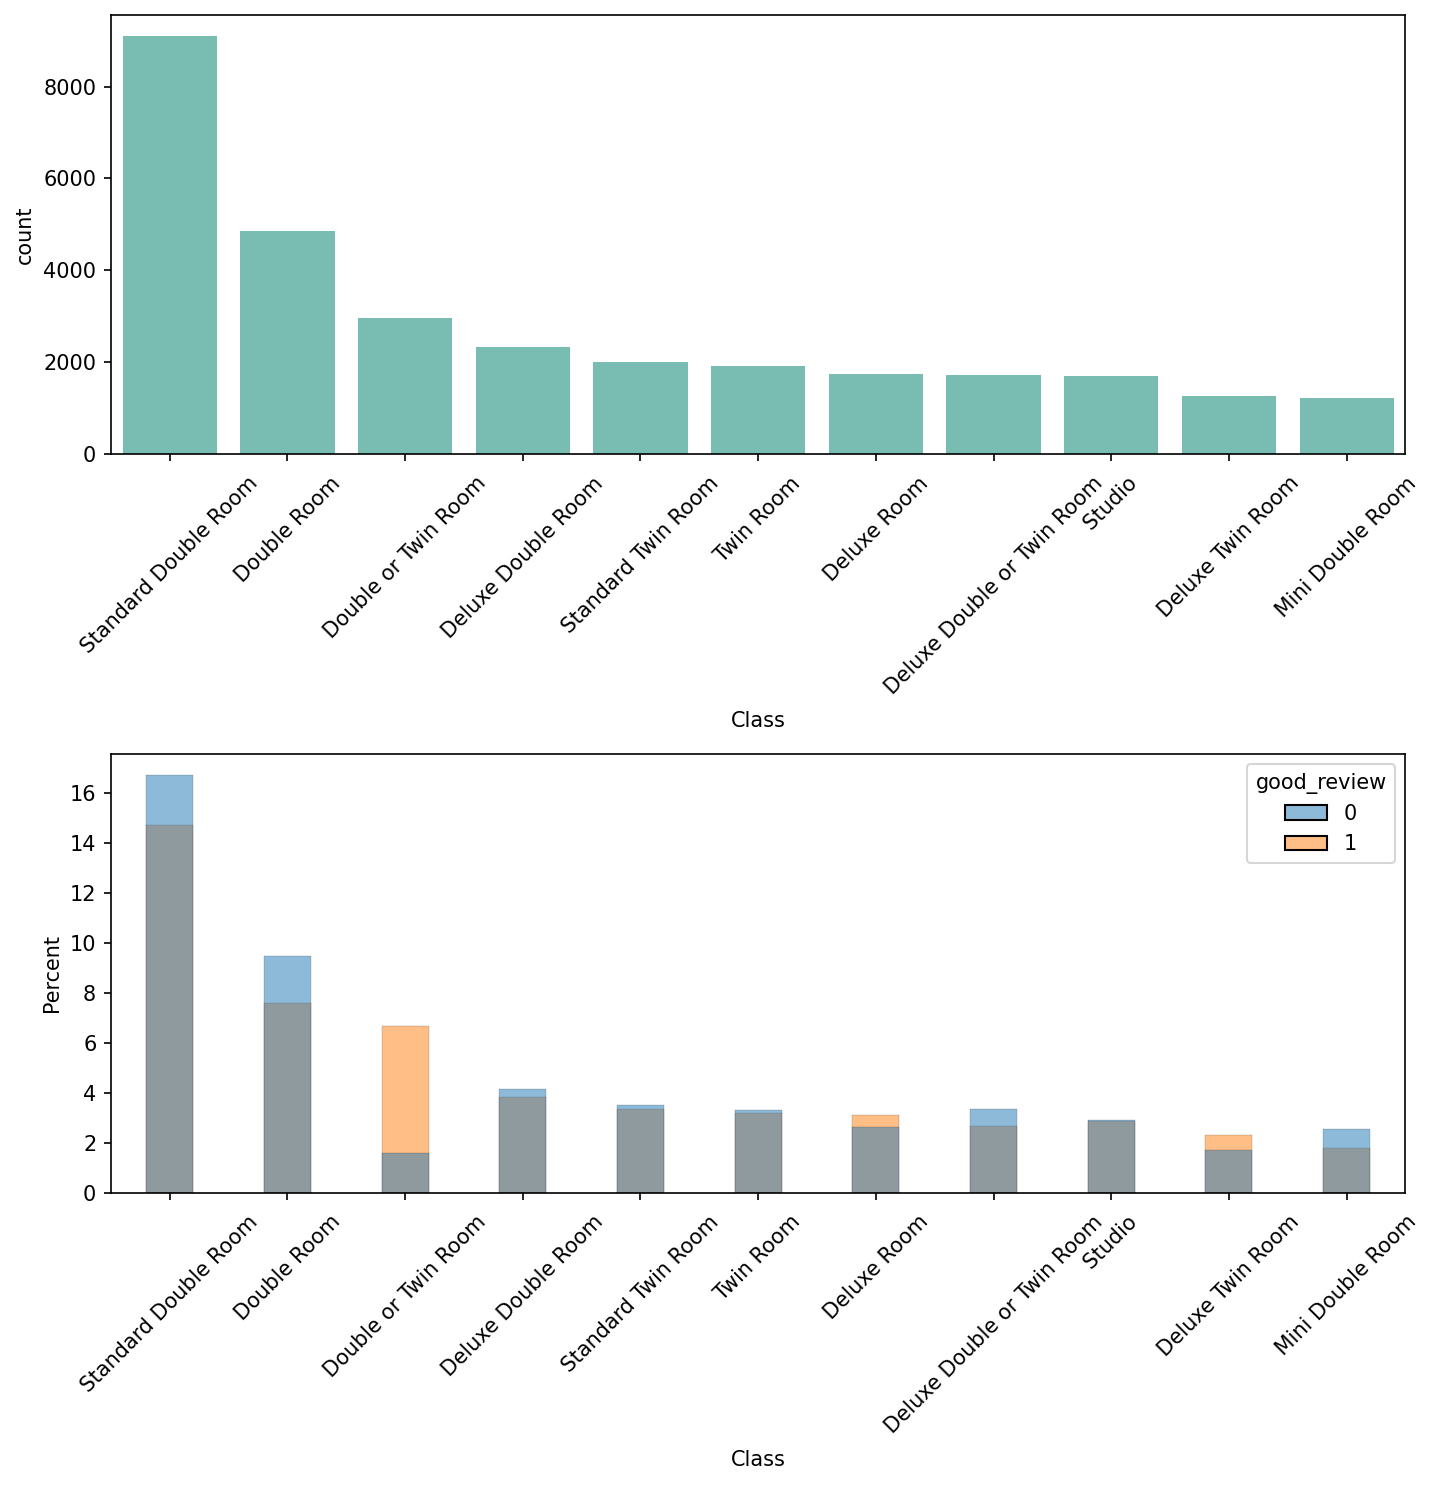

In [18]:



fig= plt.figure(figsize=(9.75,10),dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#plot_bar_sp(df_tr,"nights_stayed_","title",orient="x", time_series=True, clr='#6cc8ba',ax=ax1,)
#plot_bar_sp(df_tr,"nights_stayed_","title",orient="x",hue="good_review", time_series=True, clr='#6cc8ba',ax=ax2)

plot_bar_sp(df_tr,"room_type_y","title",orient="x",  clr='#6cc8ba',ax=ax1,)
plot_bar_sp(df_tr,"room_type_y","title",orient="x",hue="good_review",clr='#6cc8ba',ax=ax2)


# ax1.set_xticks([1]+np.arange(0, 10).tolist())
# ax2.set_xticks([1]+np.arange(0, 10).tolist())
ax1.set_xlim([-0.5, 10.5])
ax2.set_xlim([-0.5, 10.5])

#ax2.sharex(ax1)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=45)
fig.tight_layout()

In [19]:
display(len(df_tr.room_type_y.dropna()))
display((df_tr.room_type_y.dropna().value_counts(normalize=True)*100).head(10))
print("")

display((df_tr.room_type_y.dropna().value_counts(normalize=True)*100).tail(10))

59145

 Standard Double Room           15.397751
 Double Room                     8.205258
 Double or Twin Room             5.001268
 Deluxe Double Room              3.936089
 Standard Twin Room              3.396737
 Twin Room                       3.231042
 Deluxe Room                     2.948685
 Deluxe Double or Twin Room      2.889509
 Studio                          2.864147
 Deluxe Twin Room                2.111759
Name: room_type_y, dtype: float64

 Premier Suite                                         0.001691
 Premium guest room with balcony and lounge access     0.001691
 Two Bedroom Deluxe                                    0.001691
 Junior Suite, 1 Bedroom Suite, 1 King, City view      0.001691
 Club level, Guest room, 1 King, City view             0.001691
 Premiere Suite                                        0.001691
 Prestige Suite Bay                                    0.001691
 Queen Studio                                          0.001691
 Single Room with Bathroom                             0.001691
 Executive Guest Room with Lounge Access               0.001691
Name: room_type_y, dtype: float64

### Timeseries

In [20]:
df_tr

,name,occupant_type,from_country,room_type_y,nights_stayed_,date_stayed,month,year,month_name,date_reviewed_,month_reviewed,year_reviewed,review_score,good_review
0,Aira,Couple,Philippines,NaN,1,2022-01-01,1,2022,January,2022-01-01,1,2022,10.0,1
1,Nicanor,Family,Philippines,Triple Room,2,2022-11-01,11,2022,November,2022-11-01,11,2022,7.0,0
2,Henry,Couple,Philippines,NaN,1,2022-06-01,6,2022,June,2022-06-01,6,2022,5.0,0
3,Vinu,Solo traveler,India,Deluxe Room,6,2022-05-01,5,2022,May,2022-05-01,5,2022,6.0,0
4,Salt,Family,United Arab Emirates,Triple Room,1,2022-05-01,5,2022,May,2022-05-01,5,2022,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76531,Kern,Solo traveler,Philippines,NaN,1,2022-03-01,3,2022,March,2022-03-01,3,2022,10.0,1
76532,Jun,Couple,Philippines,NaN,1,2022-03-01,3,2022,March,2022-03-01,3,2022,10.0,1
76533,Kanji,Solo traveler,Philippines,NaN,2,2019-12-01,12,2019,December,2019-12-01,12,2019,5.0,0
76534,Antonino,Family,United Kingdom,NaN,2,2019-12-01,12,2019,December,2019-12-01,12,2019,2.9,0


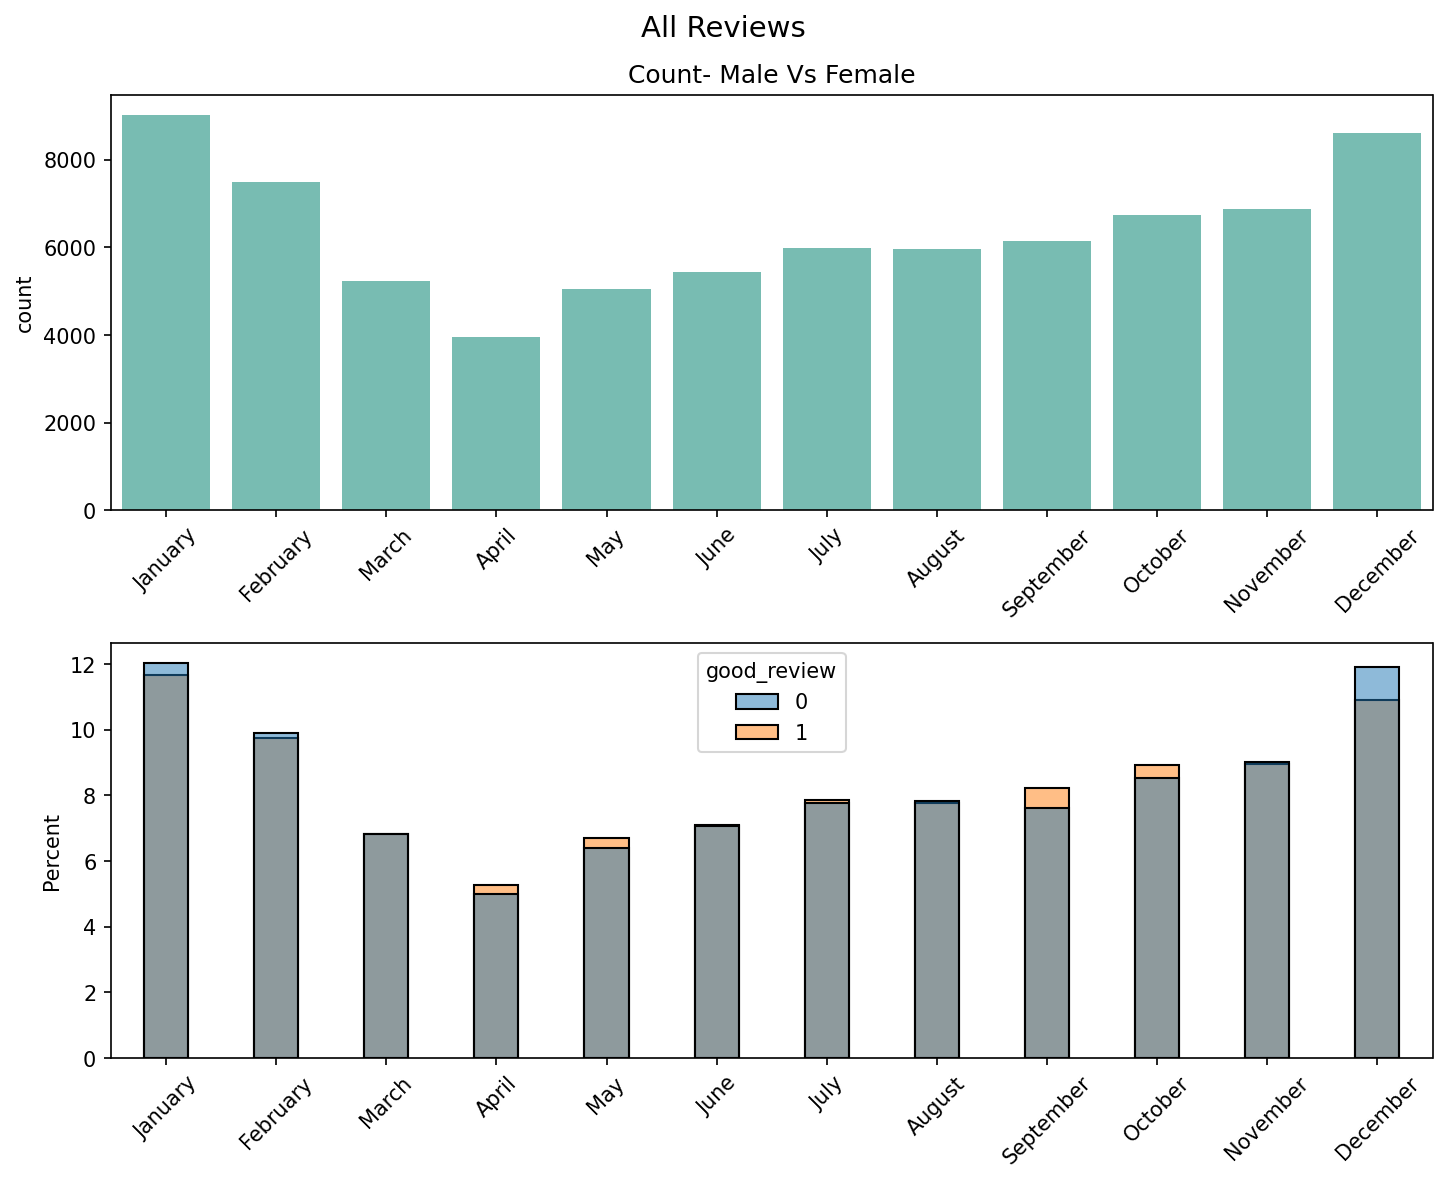

In [21]:


fig= plt.figure(figsize=(9.75,8),dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#plt.tight_layout()
#ax3 = fig.add_subplot(133)

plot_bar_sp(df_tr,"month_name","title",orient="x", time_series=True,month_data=True, clr='#6cc8ba',ax=ax1,long_dates=True)
plot_bar_sp(df_tr,"month_name","title",orient="x",hue="good_review", time_series=True,month_data=True, clr='#6cc8ba',ax=ax2,long_dates=True)

#sns.boxplot(data=df, ax=ax2, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = False)#,color='#6cc8ba')
#sns.boxplot(data=df, ax=ax3, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = True)#,color='#6cc8ba')
#sns.boxplot(ax=ax2, y=df["age"], orient="v",showfliers = False,color='#6cc8ba')
#sns.boxplot(ax=ax3, y=df["age"], orient="v",showfliers = True,color='#6cc8ba')

#ax2.yaxis.label.set_visible(False)
#ax3.yaxis.label.set_visible(False)

ax1.set_title("Count- Male Vs Female")
ax2.set_title("")
ax2.sharex(ax1)
#ax2.set_title("Age Distribution")
#ax3.set_title("Age with Outliers")
ax1.xaxis.label.set_visible(False)
ax2.xaxis.label.set_visible(False)
fig.suptitle("All Reviews", fontsize=14)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=45)

fig.tight_layout()


In [22]:
df_tr.month.value_counts(normalize=True)*100

1     11.797063
12    11.244382
2      9.800617
11     8.984008
10     8.802394
9      8.032821
7      7.830302
8      7.791105
6      7.097314
3      6.832079
5      6.611268
4      5.176649
Name: month, dtype: float64

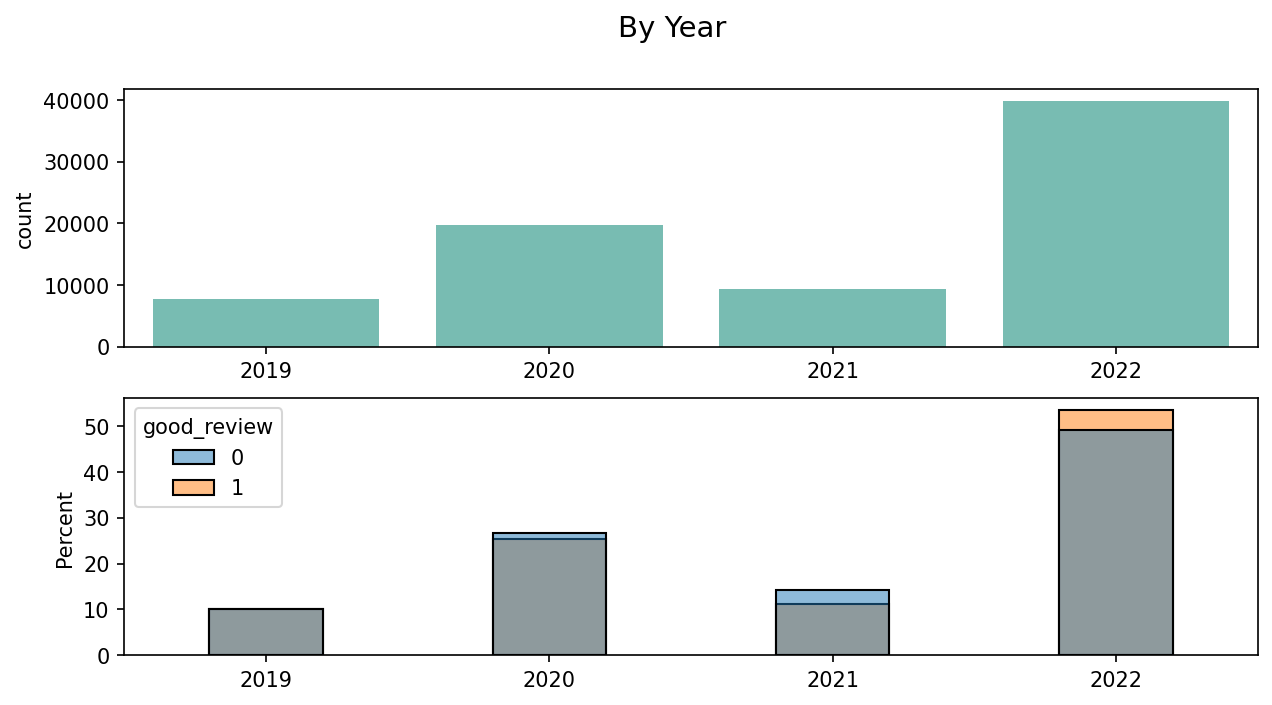

In [23]:


fig= plt.figure(figsize=(9.75,5),dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#plt.tight_layout()
#ax3 = fig.add_subplot(133)

plot_bar_sp(df_tr,"year","title",orient="x", time_series=True, clr='#6cc8ba',ax=ax1,)
plot_bar_sp(df_tr,"year","title",orient="x", hue="good_review", time_series=True, clr='#6cc8ba',ax=ax2)

#sns.boxplot(data=df, ax=ax2, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = False)#,color='#6cc8ba')
#sns.boxplot(data=df, ax=ax3, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = True)#,color='#6cc8ba')
#sns.boxplot(ax=ax2, y=df["age"], orient="v",showfliers = False,color='#6cc8ba')
#sns.boxplot(ax=ax3, y=df["age"], orient="v",showfliers = True,color='#6cc8ba')

#ax2.yaxis.label.set_visible(False)
#ax3.yaxis.label.set_visible(False)

#ax1.set_title("Count- Male Vs Female")
#ax2.set_title("")
ax2.sharex(ax1)
#ax2.set_title("Age Distribution")
#ax3.set_title("Age with Outliers")

fig.suptitle("By Year", fontsize=14)

ax1.xaxis.label.set_visible(False)
ax2.xaxis.label.set_visible(False)